In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [2]:
df = pd.read_csv('../../Datasets/general/Automobile_data.csv')

In [11]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [13]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [14]:
df.iloc[9]

symboling                    0
normalized-losses            ?
make                      audi
fuel-type                  gas
aspiration               turbo
num-of-doors               two
body-style           hatchback
drive-wheels               4wd
engine-location          front
wheel-base                99.5
length                   178.2
width                     67.9
height                    52.0
curb-weight               3053
engine-type                ohc
num-of-cylinders          five
engine-size                131
fuel-system               mpfi
bore                      3.13
stroke                     3.4
compression-ratio          7.0
horsepower                 160
peak-rpm                  5500
city-mpg                    16
highway-mpg                 22
price                        ?
Name: 9, dtype: object

### Handle Categorical columns

In [18]:
df['num-of-doors'].value_counts()

4    116
2     89
Name: num-of-doors, dtype: int64

In [17]:
df['num-of-doors'] = df['num-of-doors'].map({'four':4, 'two':2, '?':4}, )
# df['horsepower'] = pd.to_numeric(df['horsepower'])

### Handle continues columns

In [19]:
df.loc[df['price'].str.isnumeric() == False]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
9,0,?,audi,gas,turbo,2,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.4,7.0,160,5500,16,22,?
44,1,?,isuzu,gas,std,2,sedan,fwd,front,94.5,...,90,2bbl,3.03,3.11,9.6,70,5400,38,43,?
45,0,?,isuzu,gas,std,4,sedan,fwd,front,94.5,...,90,2bbl,3.03,3.11,9.6,70,5400,38,43,?
129,1,?,porsche,gas,std,2,hatchback,rwd,front,98.4,...,203,mpfi,3.94,3.11,10.0,288,5750,17,28,?


In [20]:
df.loc[df['price'].str.isnumeric() == False, 'price'] = 0

In [21]:
df.loc[df['normalized-losses'].str.isnumeric() == False, 'normalized-losses'] = 0

In [22]:
df['price'] = pd.to_numeric(df['price'])

In [23]:
df.loc[df['horsepower'].str.isnumeric() == False, 'horsepower'] = 0
df['horsepower'] = pd.to_numeric(df['horsepower'])

<Axes: xlabel='normalized-losses', ylabel='Count'>

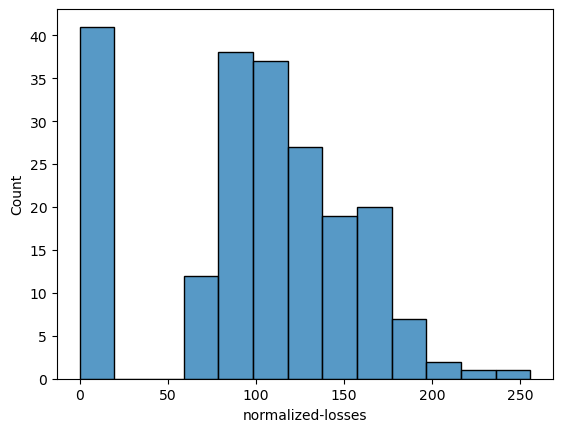

In [24]:
df['normalized-losses'] = df['normalized-losses'].astype(np.float64)
sns.histplot(df['normalized-losses'])

In [25]:
df.describe()

,symboling,normalized-losses,num-of-doors,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,horsepower,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,97.600000,3.131707,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,103.239024,25.219512,30.751220,12949.429268
std,1.245307,58.282073,0.993715,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,40.832470,6.542142,6.886443,8079.043284
min,-2.000000,0.000000,2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,0.000000,13.000000,16.000000,0.000000
25%,0.000000,77.000000,2.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,70.000000,19.000000,25.000000,7689.000000
50%,1.000000,103.000000,4.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,95.000000,24.000000,30.000000,10198.000000
75%,2.000000,137.000000,4.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,116.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,4.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,288.000000,49.000000,54.000000,45400.000000


In [26]:
df.corr(numeric_only=True)

,symboling,normalized-losses,num-of-doors,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,horsepower,city-mpg,highway-mpg,price
symboling,1.000000,0.196837,-0.663595,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.178515,0.065759,-0.035823,0.034606,-0.071461
normalized-losses,0.196837,1.000000,-0.128076,-0.196317,-0.236562,-0.196650,-0.167410,-0.261289,-0.301343,-0.068856,-0.182771,0.150868,0.171033,-0.237939
num-of-doors,-0.663595,-0.128076,1.000000,0.439635,0.385675,0.197735,0.540286,0.190720,0.013919,0.171797,-0.120744,-0.014271,-0.037452,0.061230
wheel-base,-0.531954,-0.196317,0.439635,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.249786,0.351681,-0.470414,-0.544082,0.578804
length,-0.357612,-0.236562,0.385675,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.158414,0.526253,-0.670909,-0.704662,0.685019
width,-0.232919,-0.196650,0.197735,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.181129,0.614047,-0.642704,-0.677218,0.695654
height,-0.541038,-0.167410,0.540286,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.261214,-0.097632,-0.048640,-0.107358,0.158436
curb-weight,-0.227691,-0.261289,0.190720,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.151362,0.728550,-0.757414,-0.797465,0.799773
engine-size,-0.105790,-0.301343,0.013919,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.028971,0.781577,-0.653658,-0.677470,0.838097
compression-ratio,-0.178515,-0.068856,0.171797,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,1.000000,-0.190032,0.324701,0.265201,0.077959


<Axes: >

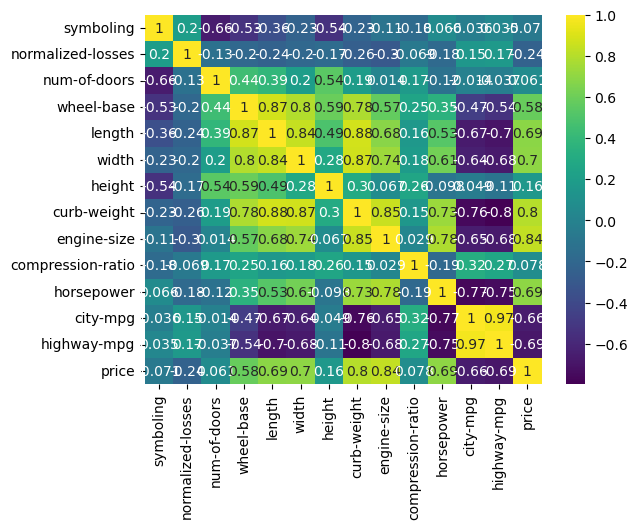

In [27]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='viridis', )

<Axes: xlabel='wheel-base', ylabel='Count'>

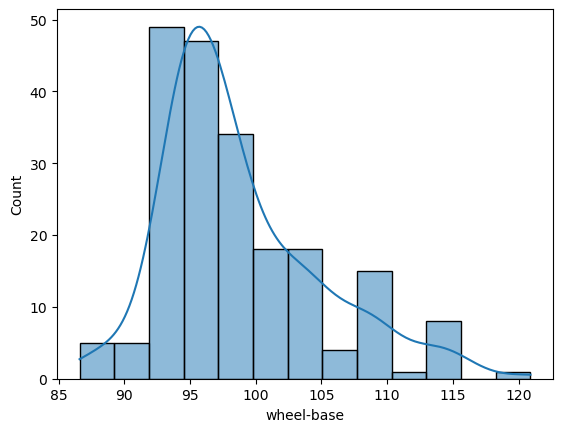

In [28]:
sns.histplot(df['wheel-base'], kde=True)

<Axes: xlabel='price', ylabel='Count'>

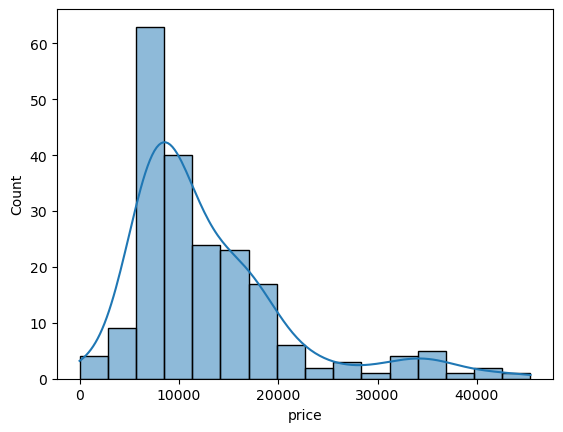

In [29]:
sns.histplot(df['price'], kde=True)

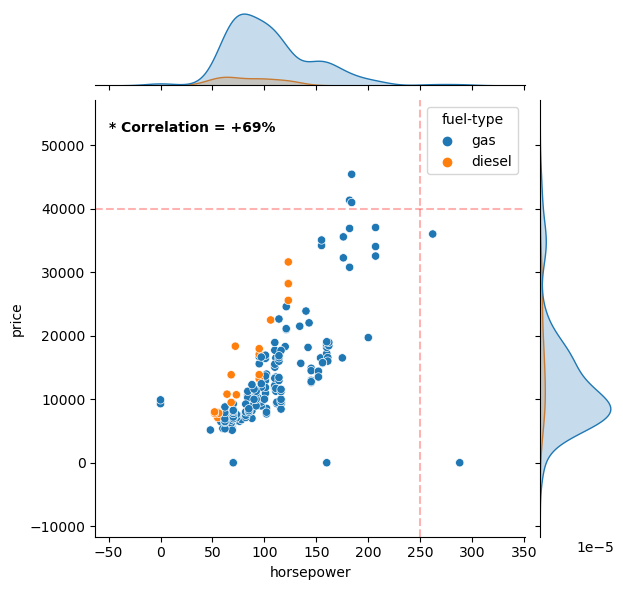

In [30]:
ax = sns.jointplot(data=df, y='price', x='horsepower', hue='fuel-type' )
plt.text(x=-50, y=52000, s='* Correlation = +69%', horizontalalignment='left', size='medium', color='black', weight='semibold')

plt.axhline(y=40000, c='r', ls='--', alpha=0.3)
plt.axvline(x=250, c='r', ls='--', alpha=0.3)


<Axes: xlabel='num-of-doors', ylabel='horsepower'>

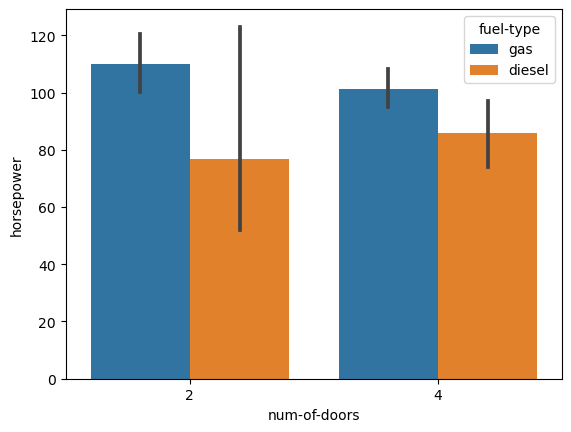

In [33]:
sns.barplot(data=df, x='num-of-doors', y='horsepower', hue='fuel-type')

<Axes: xlabel='num-of-doors', ylabel='horsepower'>

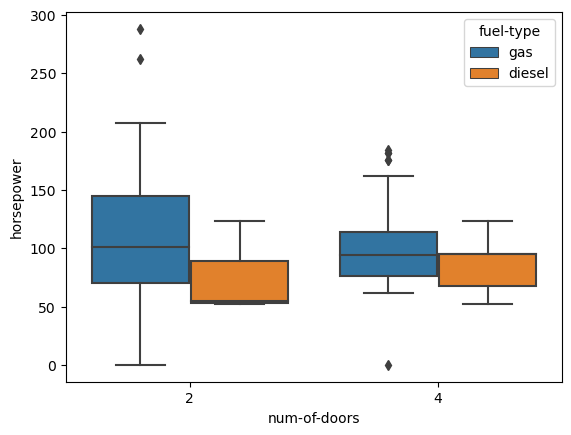

In [31]:
sns.boxplot(data=df, x='num-of-doors', y='horsepower', hue='fuel-type')

<Axes: xlabel='fuel-type', ylabel='horsepower'>

C:\ProgramData\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 7.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


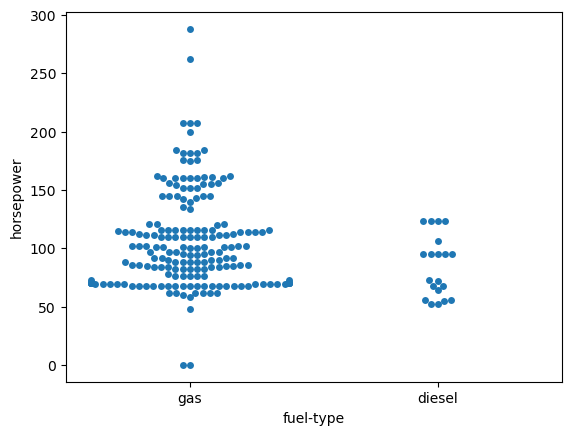

In [32]:
sns.swarmplot(data=df, y='horsepower', x='fuel-type')

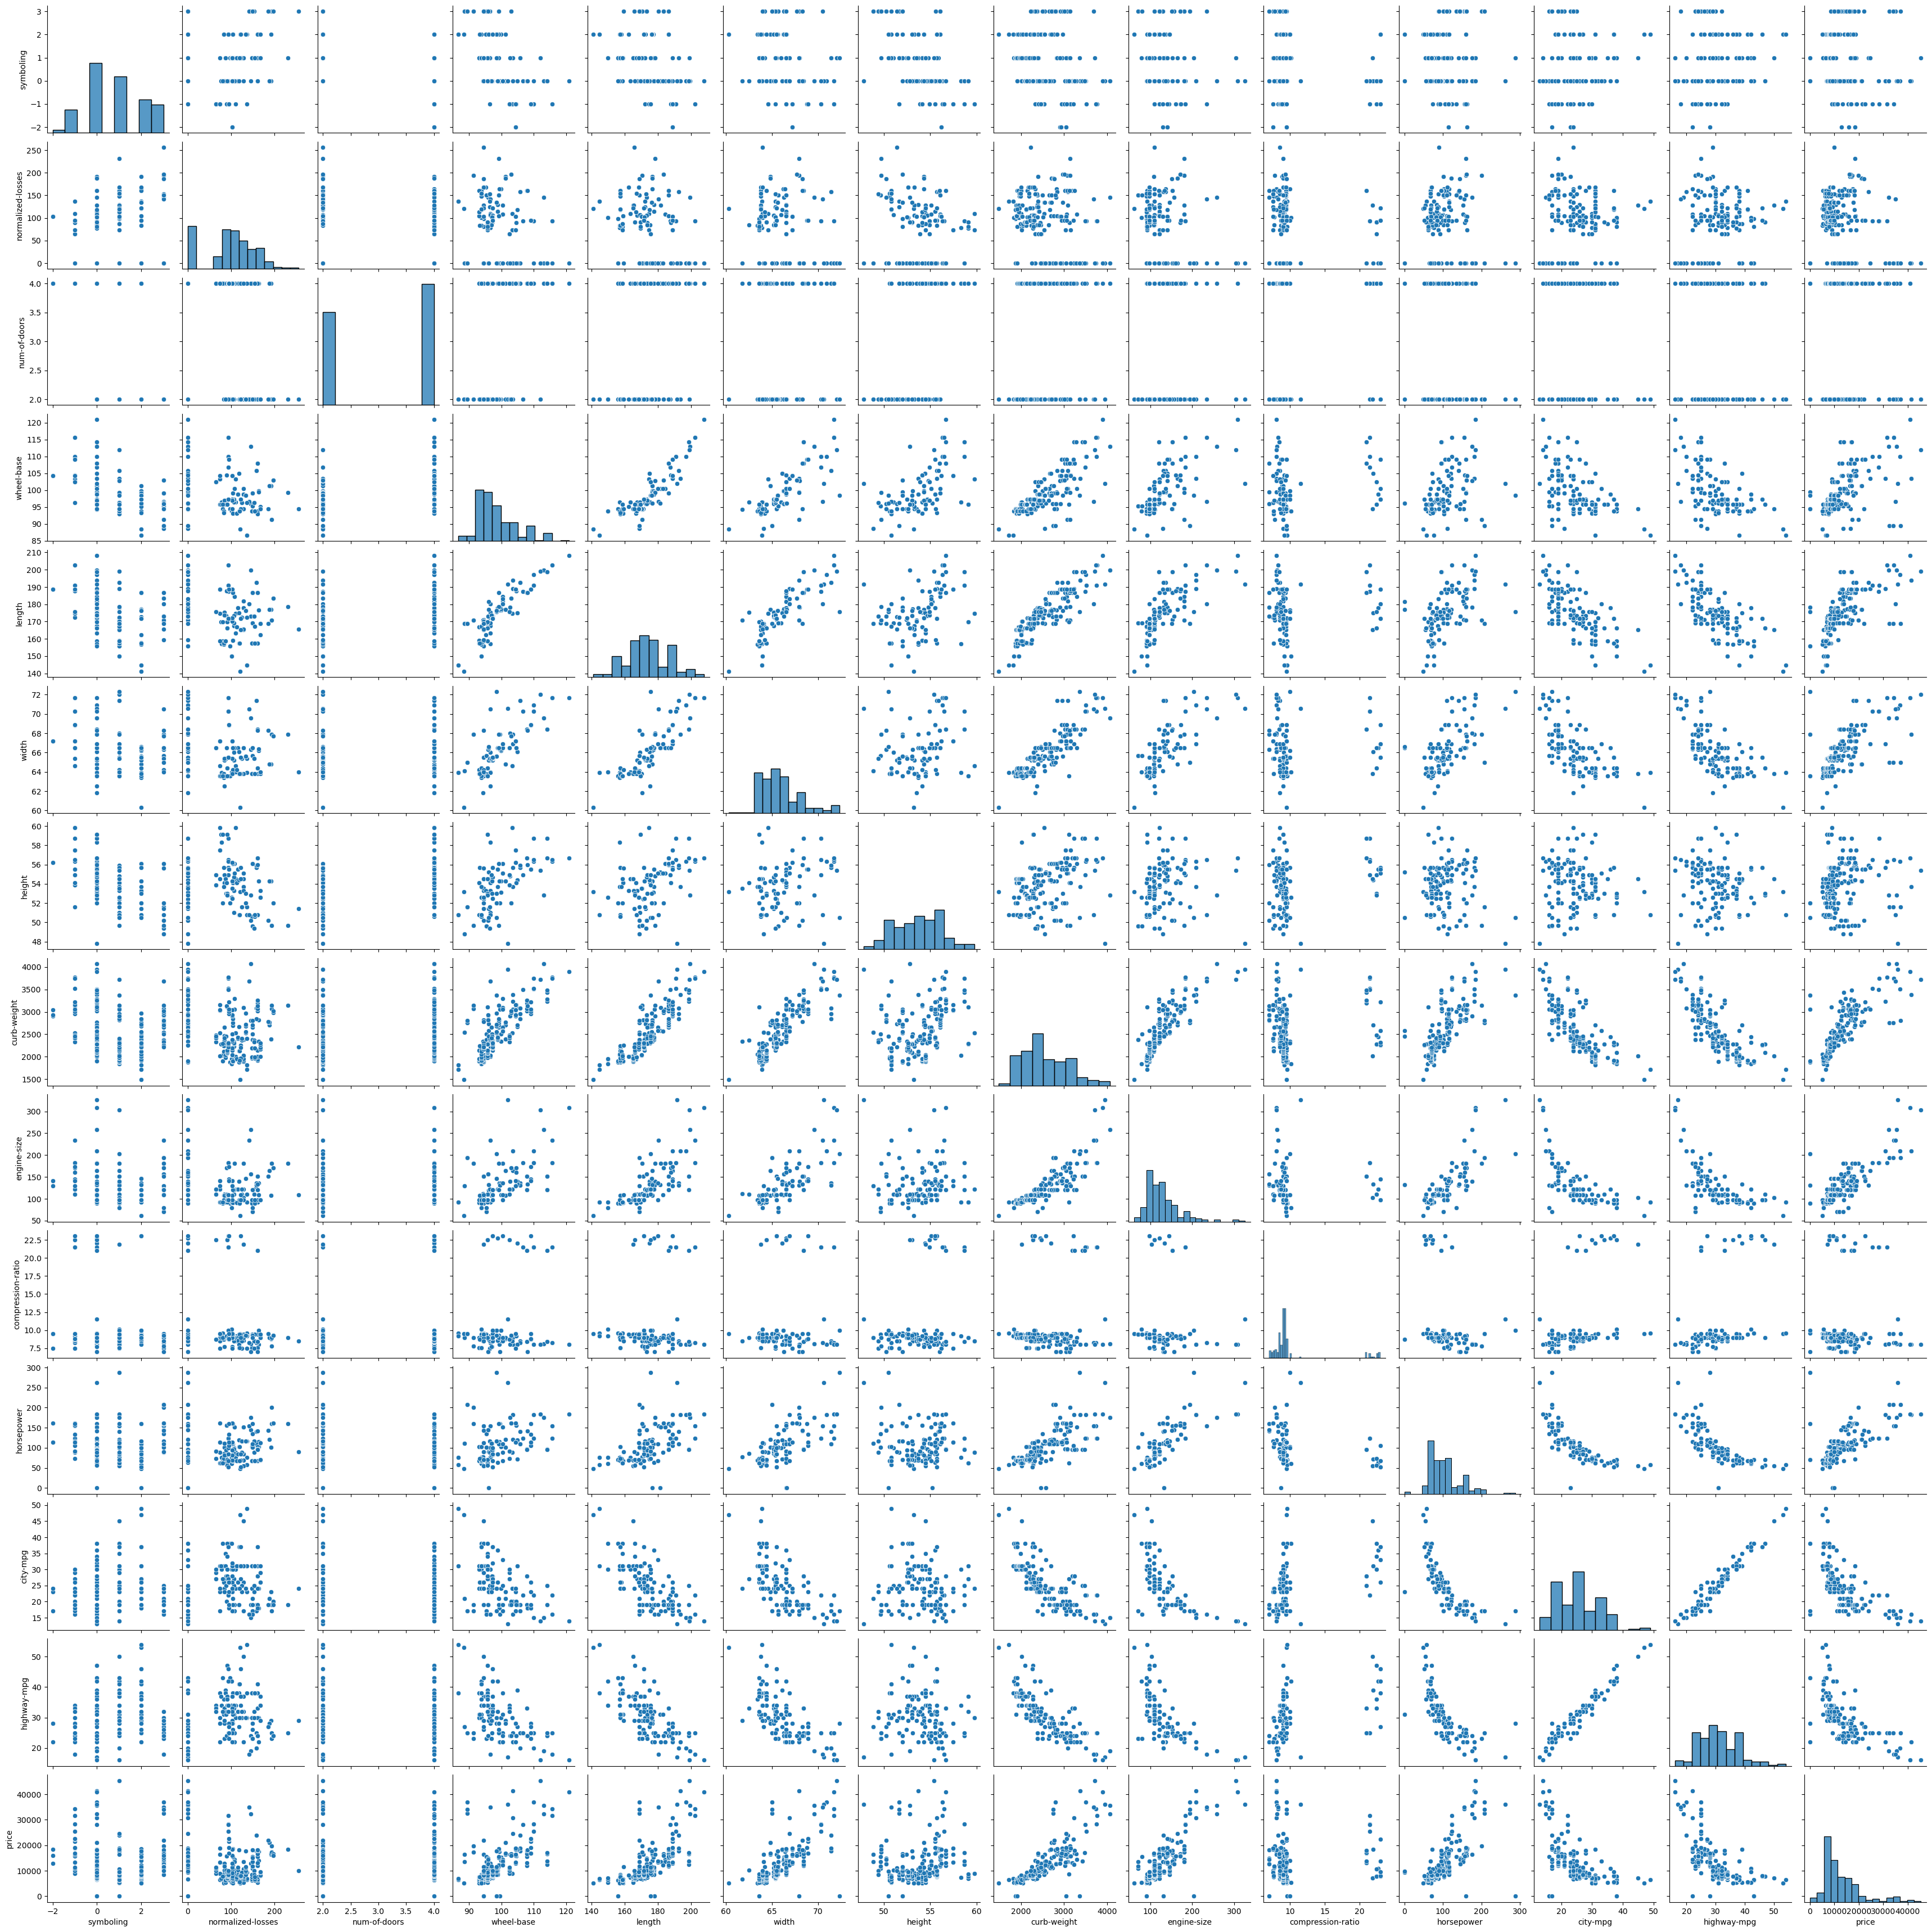

In [34]:
sns.pairplot(data=df)